In [56]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
import matplotlib.colors as clr
import seaborn as sns
import pandas as pd
import numpy as np
import pathlib

# from visualizers.io import IO
from visualizers.figure import FigureRenderer

from queso.io import IO

In [57]:
def load_data(io, ns, ks):
    data = {}
    for n, k in zip(ns, ks):
        _d = {}
        fid = io.path.joinpath(f'n={n}_k={k}.pkl')
        if fid.is_file():
            _df = io.load_dataframe(fid.stem)

            # fix datatype issues
            _df["fi"] = _df["fi"].astype('float64')

        else:
            _df = None

        _d[k] = _df
        data[n] = _d


    return data

io = IO(folder=r"pure_qfi_batch_sweep/cnot_2local_ansatz/optimization", verbose=False)
ns = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12]
ns.reverse()
ks = len(ns) * [12]
data = load_data(io, ns, ks)

In [58]:
frender = FigureRenderer(
    path = pathlib.Path("figure_renders"),
    # path=paths["save"],
    style="poster"
)
for n, d in data.items():
    for k, df in d.items():
        print(n, k, type(df))

12 12 <class 'pandas.core.frame.DataFrame'>
10 12 <class 'pandas.core.frame.DataFrame'>
8 12 <class 'pandas.core.frame.DataFrame'>
7 12 <class 'pandas.core.frame.DataFrame'>
6 12 <class 'pandas.core.frame.DataFrame'>
5 12 <class 'pandas.core.frame.DataFrame'>
4 12 <class 'pandas.core.frame.DataFrame'>
3 12 <class 'pandas.core.frame.DataFrame'>
2 12 <class 'pandas.core.frame.DataFrame'>
1 12 <class 'pandas.core.frame.DataFrame'>


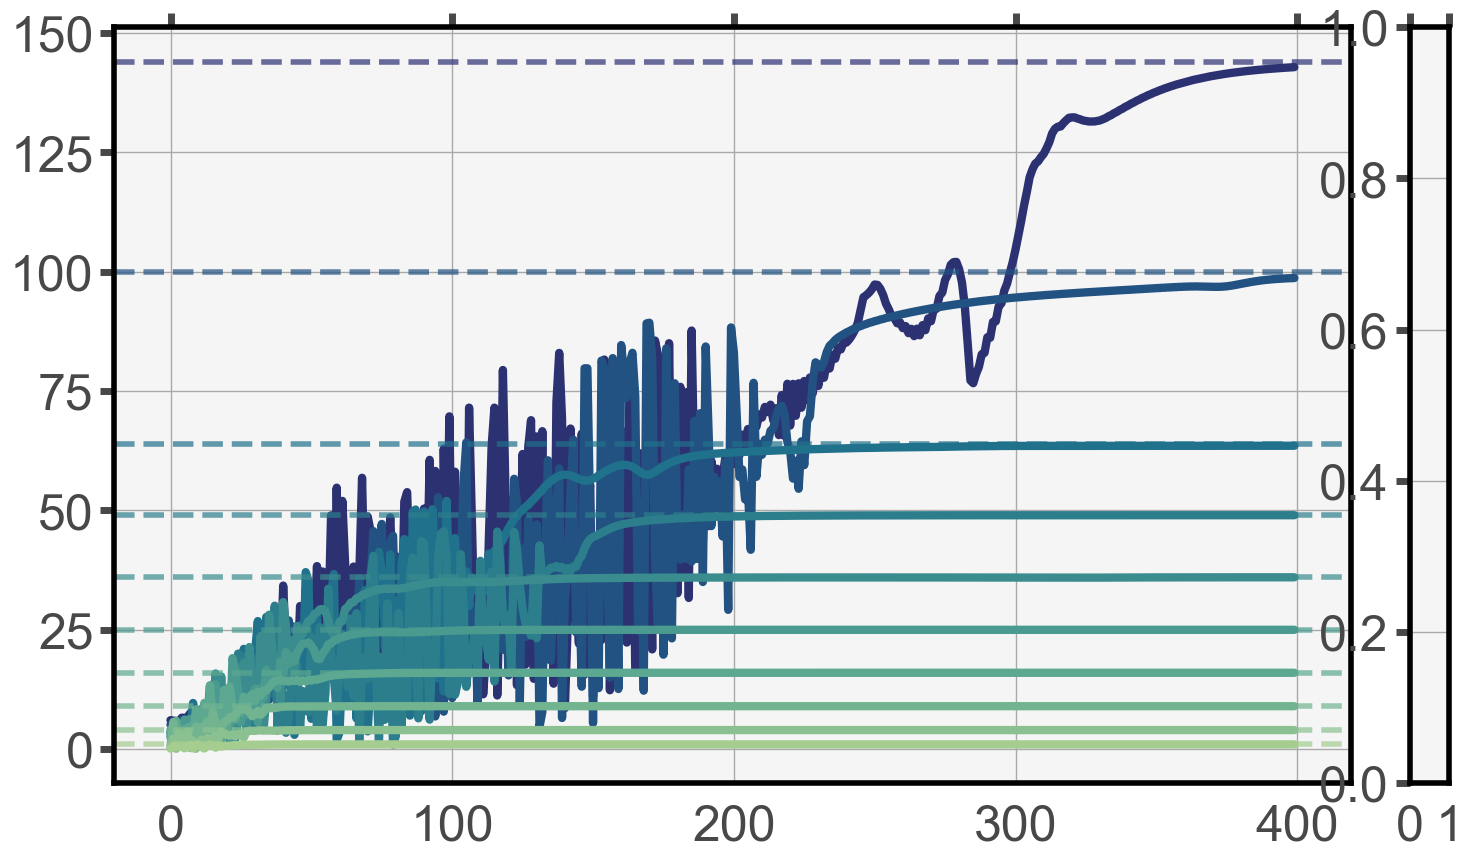

In [59]:
fig, ax = frender.figure_single_axis(width_ax=314, height_ax=192, left=50, right=50, bottom=50, top=50)
ax_cbar = frender.add_axis(fig=fig, width_ax=10, height_ax=192, left=50+314+15, right=5, bottom=50, top=50)
colors = lambda x: sns.color_palette("crest", as_cmap=True)((x - 2) / (8 - 2))

fi = "qfi"

norm = mpl.colors.Normalize(
    vmin=np.min(ns),
    vmax=np.max(ns))
cmap = sns.color_palette("crest", as_cmap=True)
smap = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)

d = 2
ind = [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
ls_ghz = dict(alpha=0.7, ls="--", lw=4)
ls_param = dict(ls='-', lw=6, alpha=1.0)
for i, n in enumerate(ns):
    k = ks[i]
    df = data[n][k]

    row = df.loc[df["fi"].idxmax()]
    # row = df.iloc[ind[i]]

    loss = row.loss
    ax.plot(loss, label=f"$n={n}$", color=smap.to_rgba(n), **ls_param)
    ax.axhline(n ** 2, color=smap.to_rgba(n), **ls_ghz)

In [60]:
ax.grid(None)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position("top")

boundaries = np.arange(1, 13)
cbar = plt.colorbar(smap, cax=ax_cbar, boundaries=boundaries)
tick_locs = (np.arange(2, 13) - 0.5)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(np.arange(2, 13))
cbar.ax.set_ylabel('$n$ qubits')

lines = [Line2D([0], [0], color="black", **ls_param), Line2D([0], [0], color="black", **ls_ghz)]
labels = ['parameterized probe', 'GHZ probe ($n^2$)']
ax.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.01),
          fancybox=True, shadow=True, ncol=4)

ax.set(xlabel="Optimization step")
ax.set(ylabel=r'Quantum Fischer Information, $\mathcal{I}^{(Q)}(\varphi)$')
# fig.show()

[Text(-3.8888888888888893, 0.5, 'Quantum Fischer Information, $\\mathcal{I}^{(Q)}(\\varphi)$')]

<Figure size 800x550 with 0 Axes>

In [61]:
frender.save_figure(fig, filename="piquil-talk-qfi-render")


Saving to figure_renders/piquil-talk-qfi-render


AttributeError: 'NoneType' object has no attribute 'loc'

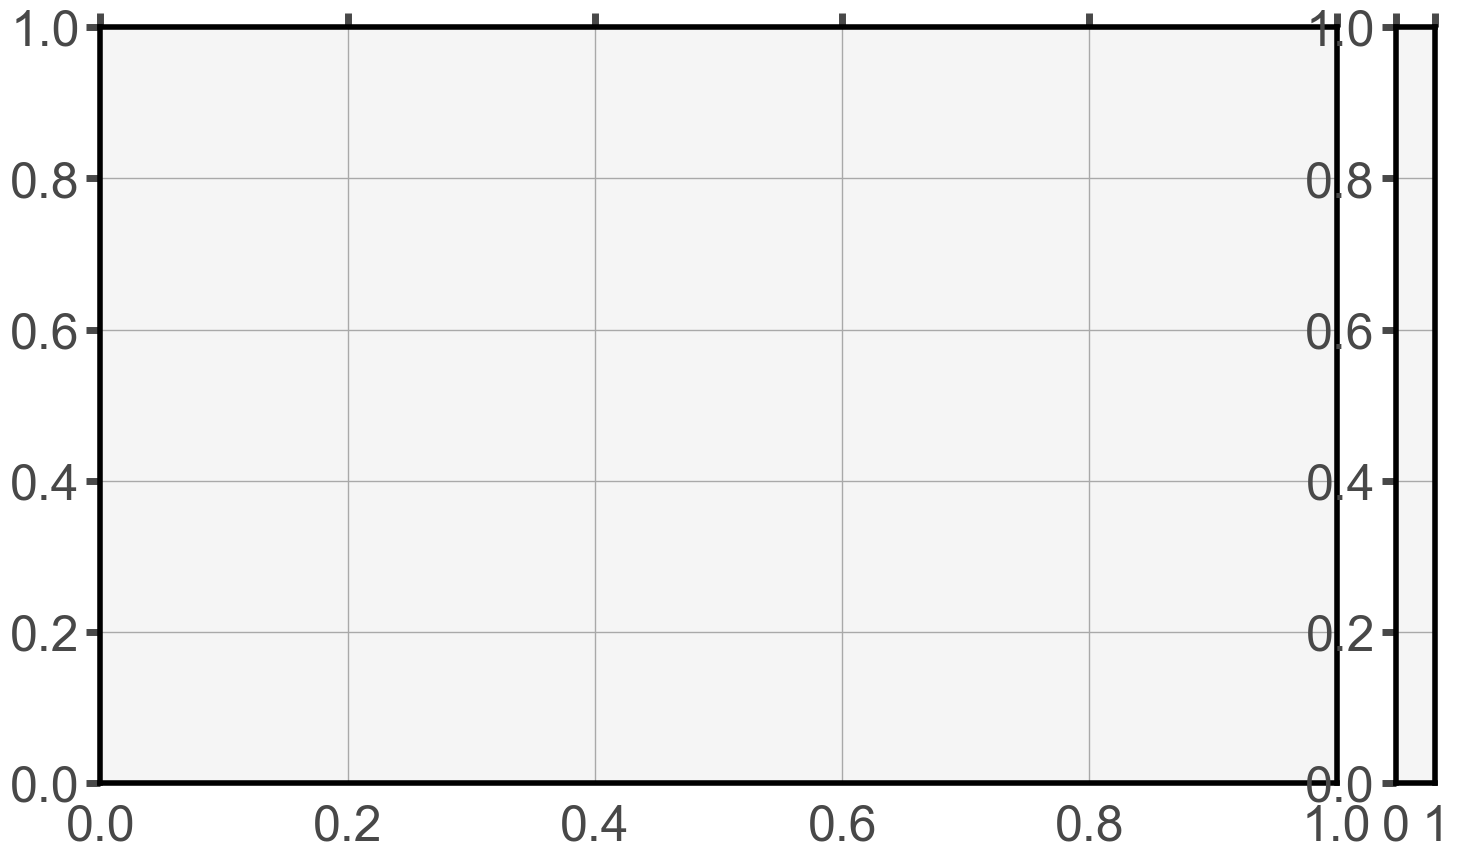

In [63]:
io = IO(folder=r"noisy_cfi_batch_sweep/cnot_2local_ansatz/optimization", verbose=False)
ns = [1, 2, 3, 4, 5, 6, 7, 8]
ns.reverse()
ks = len(ns) * [12]

data = load_data(io, ns, ks)

fig, ax = frender.figure_single_axis(width_ax=314, height_ax=192, left=50, right=50, bottom=50, top=50)
ax_cbar = frender.add_axis(fig=fig, width_ax=10, height_ax=192, left=50+314+15, right=5, bottom=50, top=50)
colors = lambda x: sns.color_palette("crest", as_cmap=True)((x - 2) / (8 - 2))

fi = "cfi"

norm = mpl.colors.Normalize(
    vmin=np.min(ns),
    vmax=np.max(ns))
cmap = sns.color_palette("crest", as_cmap=True)
smap = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)

d = 2
ind = [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
ls_ghz = dict(alpha=0.7, ls="--", lw=4)
ls_param = dict(ls='-', lw=6, alpha=1.0)
for i, n in enumerate(ns):
    k = ks[i]
    df = data[n][k]

    row = df.loc[df["fi"].idxmax()]
    # row = df.iloc[ind[i]]

    loss = row.loss
    ax.plot(loss, label=f"$n={n}$", color=smap.to_rgba(n), **ls_param)
    ax.axhline(n ** 2, color=smap.to_rgba(n), **ls_ghz)

ax.grid(None)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position("top")

boundaries = np.arange(1, 13)
cbar = plt.colorbar(smap, cax=ax_cbar, boundaries=boundaries)
tick_locs = (np.arange(2, 13) - 0.5)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(np.arange(2, 13))
cbar.ax.set_ylabel('$n$ qubits')

lines = [Line2D([0], [0], color="black", **ls_param), Line2D([0], [0], color="black", **ls_ghz)]
labels = ['parameterized probe', 'GHZ probe ($n^2$)']
ax.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.01),
          fancybox=True, shadow=True, ncol=4)

ax.set(xlabel="Optimization step")
ax.set(ylabel=r'Classical Fischer Information, $\mathcal{I}^{(C)}(\varphi)$')
# fig.show()
frender.save_figure(fig, filename="piquil-talk-cfi-render")
